In [1]:
from keras import models
from keras import layers

def build_network(hidden_layer_size, output_size=10):
    network = models.Sequential()
    network.add(layers.Dense(hidden_layer_size, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dense(output_size, activation='softmax'))
    
    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return network

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape((-1, 28*28))
    x_train = x_train.astype('float32')/255

    x_test = x_test.reshape((-1, 28*28))
    x_test = x_test.astype('float32')/255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [3]:
network = build_network(512)
x_train, y_train, x_test, y_test = prepare_data()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
history = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.2864 - acc: 0.9173 - val_loss: 0.1450 - val_acc: 0.9570
Epoch 2/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.1197 - acc: 0.9651 - val_loss: 0.1126 - val_acc: 0.9642
Epoch 3/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.0768 - acc: 0.9772 - val_loss: 0.0928 - val_acc: 0.9723
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.0563 - acc: 0.9834 - val_loss: 0.0836 - val_acc: 0.9747
Epoch 5/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0733 - val_acc: 0.9781
Epoch 6/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.0311 - acc: 0.9908 - val_loss: 0.0903 - val_acc: 0.9743
Epoch 7/20
48000/48000 [==============================] - 2s 37us/step - loss: 0

In [5]:
from util import plot_history

plot_history(history)

<Figure size 800x400 with 2 Axes>

In [6]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 25us/step
test acc: 0.9812


In [7]:
network = build_network(256)
history2 = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.3214 - acc: 0.9088 - val_loss: 0.1711 - val_acc: 0.9494
Epoch 2/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.1442 - acc: 0.9576 - val_loss: 0.1230 - val_acc: 0.9650
Epoch 3/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.0983 - acc: 0.9713 - val_loss: 0.0988 - val_acc: 0.9701
Epoch 4/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.0740 - acc: 0.9782 - val_loss: 0.0985 - val_acc: 0.9708
Epoch 5/20
48000/48000 [==============================] - 1s 26us/step - loss: 0.0561 - acc: 0.9841 - val_loss: 0.0829 - val_acc: 0.9754
Epoch 6/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.0443 - acc: 0.9874 - val_loss: 0.0866 - val_acc: 0.9750
Epoch 7/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.0365 - acc: 0.9894 - val_loss: 0.0803 - val_acc

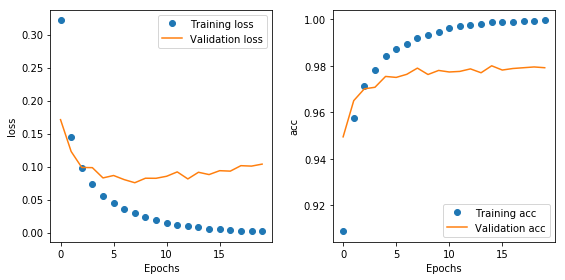

In [8]:
plot_history(history2)

In [9]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 19us/step
test acc: 0.9798


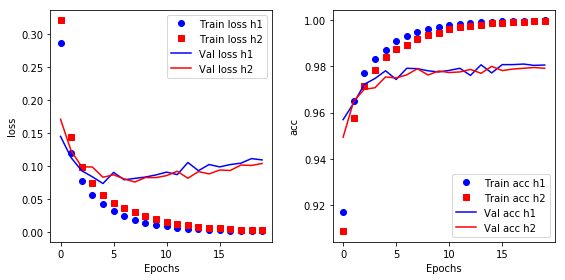

In [10]:
from util import compare_history

compare_history(history, history2)